# Import Libraries and Data

##### The Palmer penguins dataset was collected by Dr. Kristen Gorman and others at the Palmer Archipelago Long-Term Ecological Research Station in Antarctica. For a sample of 344 penguins, it specifies sex, island, 4 different physical measurements, and the species of which they belong to. Note that the word 'culmen', used in the features of 'culmen length' and 'culmen depth', refers to the top margin of the beak.

##### This data can be used for a classification exercise - the objective being to correctly determine species for as many penguins as possible, based on the other available information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('/kaggle/input/penguins/penguins.csv')
df.head()

,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Species
0,Torgersen,MALE,39.1,18.7,181.0,3750.0,Adelie
1,Torgersen,FEMALE,39.5,17.4,186.0,3800.0,Adelie
2,Torgersen,FEMALE,40.3,18.0,195.0,3250.0,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,FEMALE,36.7,19.3,193.0,3450.0,Adelie


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               344 non-null    object 
 1   Sex                  333 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Species              344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Island                  0
Sex                    11
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Species                 0
dtype: int64

In [6]:
df.dropna(axis=0, how='any', inplace=True)

In [7]:
class_counts = df.groupby('Species').size()
print(class_counts)

Species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64


In [8]:
class_counts = df.groupby('Sex').size()
print(class_counts)

Sex
FEMALE    165
MALE      168
dtype: int64


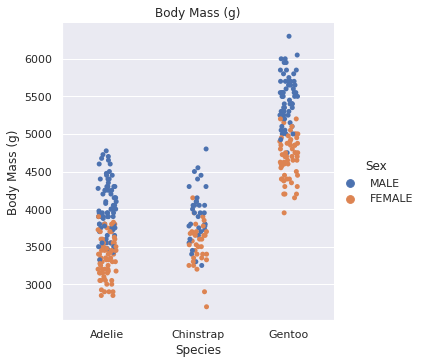

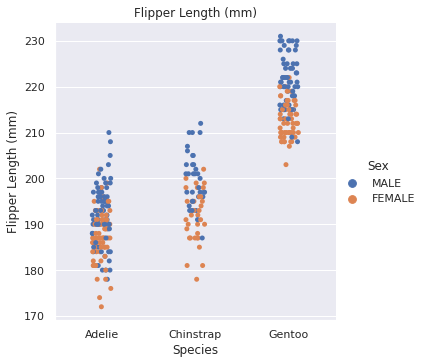

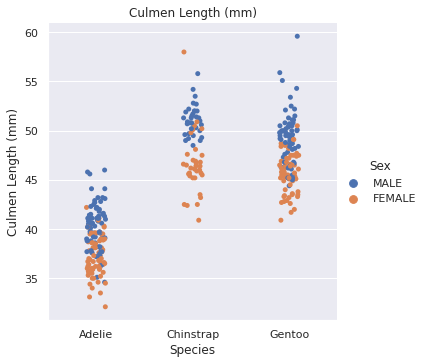

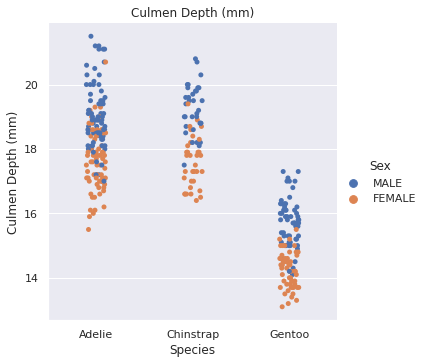

In [9]:
_ = sns.catplot(x = 'Species', y = 'Body Mass (g)', data = df, hue="Sex").set(title="Body Mass (g)") 
_ = sns.catplot(x = 'Species', y = 'Flipper Length (mm)', data = df, hue="Sex").set(title="Flipper Length (mm)") 
_ = sns.catplot(x = 'Species', y = 'Culmen Length (mm)', data = df, hue="Sex").set(title="Culmen Length (mm)") 
_ = sns.catplot(x = 'Species', y = 'Culmen Depth (mm)', data = df, hue="Sex").set(title="Culmen Depth (mm)") 

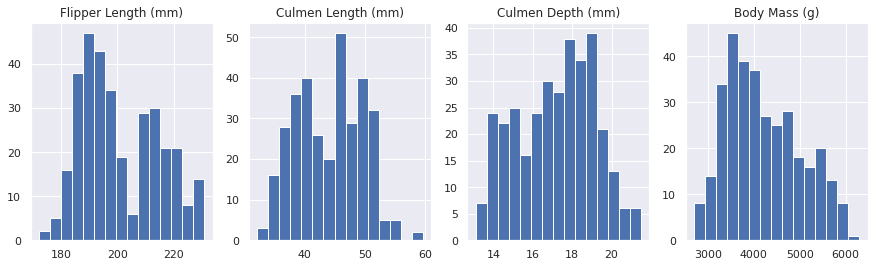

In [10]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))

k = 15

ax[0].hist(df["Flipper Length (mm)"], bins=k)
ax[0].set_title('Flipper Length (mm)')

ax[1].hist(df["Culmen Length (mm)"], bins = k)
ax[1].set_title('Culmen Length (mm)')

ax[2].hist(df["Culmen Depth (mm)"], bins = k)
ax[2].set_title('Culmen Depth (mm)')

ax[3].hist(df["Body Mass (g)"], bins = k)
ax[3].set_title('Body Mass (g)')

plt.show()

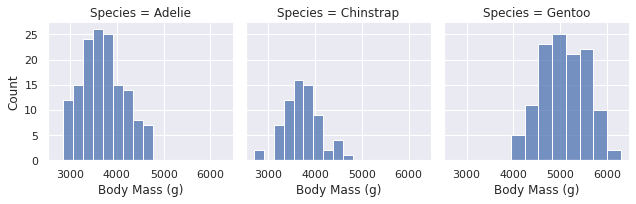

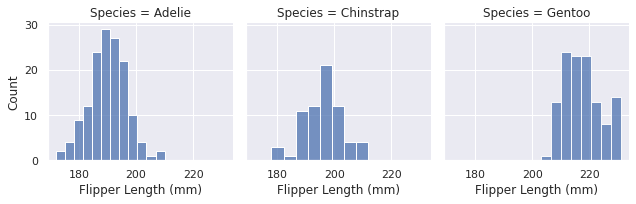

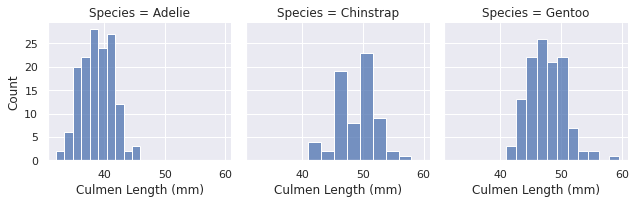

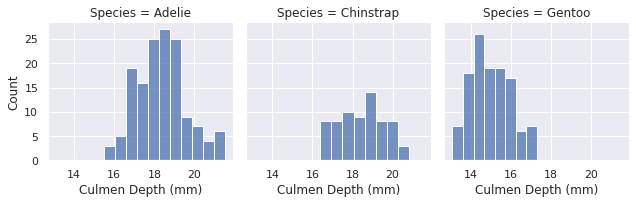

In [11]:
c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Body Mass (g)")

c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Flipper Length (mm)")

c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Culmen Length (mm)")

c = sns.FacetGrid(df, col="Species")
_ = c.map(sns.histplot, "Culmen Depth (mm)")

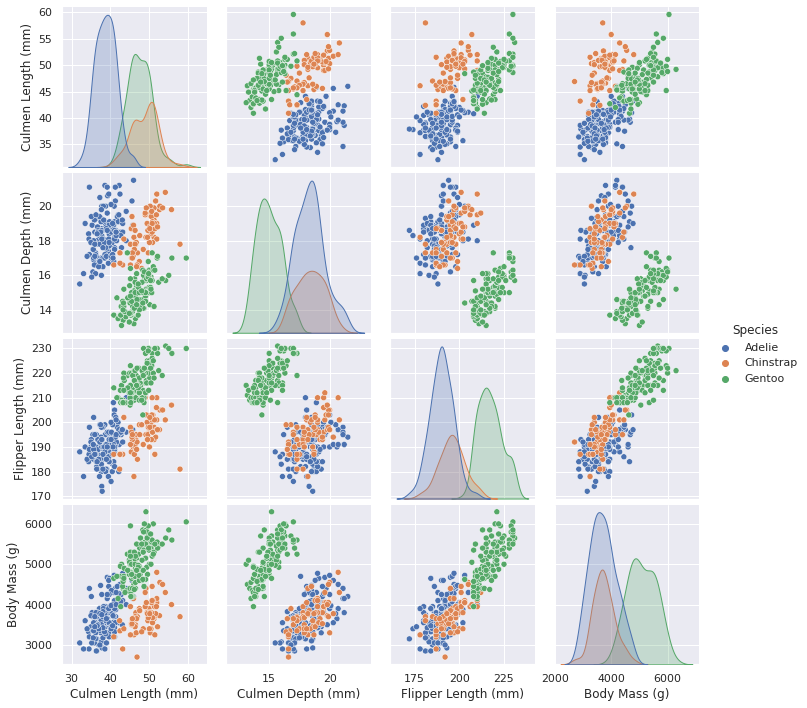

In [12]:
_ = sns.pairplot(df, hue="Species")

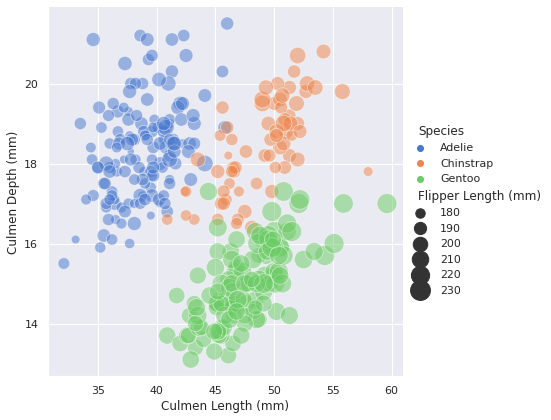

In [13]:
_ = sns.relplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", size="Flipper Length (mm)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

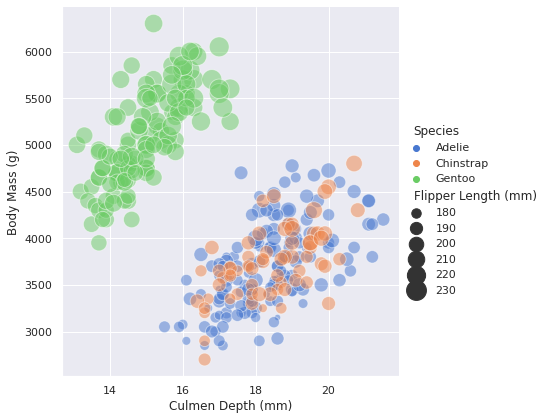

In [14]:
_ = sns.relplot(x="Culmen Depth (mm)", y="Body Mass (g)", hue="Species", size="Flipper Length (mm)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

# Preprocessing

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Sex'])
tf = le.transform(df['Sex'])
df['Sex'] = tf
df.head()

,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Species
0,Torgersen,1,39.1,18.7,181.0,3750.0,Adelie
1,Torgersen,0,39.5,17.4,186.0,3800.0,Adelie
2,Torgersen,0,40.3,18.0,195.0,3250.0,Adelie
4,Torgersen,0,36.7,19.3,193.0,3450.0,Adelie
5,Torgersen,1,39.3,20.6,190.0,3650.0,Adelie


In [16]:
array = df.values
X = array[:,1:5]
y = array[:,6]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.7, shuffle=True, random_state=123)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Classification Algorithms

In [19]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

### Unscaled Data

In [20]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=20, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.960 (0.120)
LDA: 0.990 (0.044)
KNN: 0.938 (0.096)
CART: 0.938 (0.096)
NB: 0.948 (0.091)
SVM: 0.890 (0.134)


### Standardized Data

In [21]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=20, shuffle=True)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.990 (0.044)
LDA: 0.980 (0.060)
KNN: 0.990 (0.044)
CART: 0.940 (0.111)
NB: 0.938 (0.115)
SVM: 0.980 (0.060)


# Ensemble Algorithms

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

num_folds = 20
scoring = 'accuracy'

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
ensembles.append(('BG', BaggingClassifier()))

### Unscaled Data

In [23]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.605 (0.206)
GBM: 0.950 (0.107)
RF: 0.938 (0.115)
ET: 0.960 (0.102)
BG: 0.948 (0.091)


### Standardized Data

In [24]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.640 (0.233)
GBM: 0.960 (0.102)
RF: 0.960 (0.080)
ET: 0.960 (0.080)
BG: 0.940 (0.092)


# Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression, Unscaled Data

In [26]:
c = np.array([1,0.1,0.01,0.001])
weight = np.array(['balanced', None])
penalty = np.array(['l1', 'l2', 'elasticnet', 'none'])
solver = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
param_grid = dict(C=c, class_weight=weight, penalty=penalty, solver=solver)
model = LogisticRegression(solver='liblinear', multi_class='ovr', class_weight='balanced')
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=20)

In [27]:
grid.fit(X_train, y_train)
print("Logistic Regression Grid Search, Unscaled Data")
print(round(grid.best_score_,3))

LR_c = grid.best_estimator_.C
LR_classweight = grid.best_estimator_.class_weight
LR_penalty = grid.best_estimator_.penalty
LR_solver = grid.best_estimator_.solver

print(LR_c)
print(LR_classweight)
print(LR_penalty)
print(LR_solver)

Logistic Regression Grid Search, Unscaled Data
0.98
1.0
None
l2
newton-cg


### Logistic Regression, Standardized Data

In [28]:
grid.fit(X_train_std, y_train)
print("Logistic Regression Grid Search, Standardized Data")
print(round(grid.best_score_,3))

LR_std_c = grid.best_estimator_.C
LR_std_classweight = grid.best_estimator_.class_weight
LR_std_penalty = grid.best_estimator_.penalty
LR_std_solver = grid.best_estimator_.solver

print(LR_std_c)
print(LR_std_classweight)
print(LR_std_penalty)
print(LR_std_solver)

Logistic Regression Grid Search, Standardized Data
0.99
1.0
balanced
l2
liblinear


### Linear Discriminant Analysis, Unscaled Data

In [29]:
solver = np.array(['svd', 'lsqr', 'eigen'])
n_components = np.array([2,3,4,5])
param_grid = dict(solver=solver, n_components=n_components)
model = LinearDiscriminantAnalysis()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=20)

In [30]:
grid.fit(X_train, y_train)
print("LDA Grid Search, Unscaled Data")
print(grid.best_score_)

LDA_solver = grid.best_estimator_.solver
LDA_n_components = grid.best_estimator_.n_components

print(LDA_solver)
print(LDA_n_components)

LDA Grid Search, Unscaled Data
0.99
svd
2


### Linear Discriminant Analysis, Standardized Data

In [31]:
grid.fit(X_train_std, y_train)
print("LDA Grid Search, Standardized Data")
print(grid.best_score_)

LDA_std_solver = grid.best_estimator_.solver
LDA_std_n_components = grid.best_estimator_.n_components

print(LDA_std_solver)
print(LDA_std_n_components)

LDA Grid Search, Standardized Data
0.99
svd
2


### KNN, Standardized Data

In [32]:
neighbors = np.array([2,3,4,5,6,7])
p = np.array([1,2])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
param_grid = dict(n_neighbors=neighbors, p=p, algorithm=algorithm)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=20)

In [33]:
grid.fit(X_train_std, y_train)
print("KNN Grid Search, Scaled Data")
print(grid.best_score_)

KNN_n_neighbors = grid.best_estimator_.n_neighbors
KNN_p = grid.best_estimator_.p
KNN_algorithm = grid.best_estimator_.algorithm

print(KNN_n_neighbors)
print(KNN_p)
print(KNN_algorithm)

KNN Grid Search, Scaled Data
0.99
5
1
auto


### Extra Trees Classifier, Unscaled Data

In [34]:
n_est = np.array([25,50,75,100,125,150])
max_depth = np.array([2,3,4,5,6,7,8,9])
param_grid = dict(n_estimators=n_est, max_depth=max_depth)
model = ExtraTreesClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [35]:
grid.fit(X_train, y_train)
print("ExtraTrees Grid Search")
print(grid.best_score_)

ET_n_estimators = grid.best_estimator_.n_estimators
ET_max_depth = grid.best_estimator_.max_depth

print(ET_n_estimators)
print(ET_max_depth)

ExtraTrees Grid Search
0.9894736842105264
150
6


### Extra Trees Classifier, Standardized Data

In [36]:
grid.fit(X_train_std, y_train)
print("ExtraTrees Grid Search")
print(grid.best_score_)

ET_std_n_estimators = grid.best_estimator_.n_estimators
ET_std_max_depth = grid.best_estimator_.max_depth

print(ET_std_n_estimators)
print(ET_std_max_depth)

ExtraTrees Grid Search
0.9794736842105264
125
5


# Performance Upon Test Set

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Logistic Regression

In [38]:
model = LogisticRegression(C=LR_c, 
                           class_weight=LR_std_classweight, 
                           penalty = LR_std_penalty, 
                           solver=LR_std_solver,
                           multi_class='ovr')
model.fit(X_train_std, y_train)
predictions = model.predict(X_test_std)
print("Logistic Regression on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Logistic Regression on the Test Set
0.991

Confusion Matrix
[[96  0  0]
 [ 2 47  0]
 [ 0  0 89]]


### Linear Discriminant Analysis

In [39]:
model = LinearDiscriminantAnalysis(solver=LDA_solver, n_components=LDA_n_components)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Linear Discriminant on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Linear Discriminant on the Test Set
0.991

Confusion Matrix
[[96  0  0]
 [ 2 47  0]
 [ 0  0 89]]


### KNN Classifier

In [40]:
model = KNeighborsClassifier(n_neighbors=KNN_n_neighbors, p=KNN_p, algorithm=KNN_algorithm)
model.fit(X_train_std,y_train)
predictions = model.predict(X_test_std)
print("KNN on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

KNN on the Test Set
0.987

Confusion Matrix
[[96  0  0]
 [ 3 46  0]
 [ 0  0 89]]


### ExtraTreesClassifier

In [41]:
model = ExtraTreesClassifier(n_estimators=ET_n_estimators, max_depth=ET_max_depth)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Extra Trees on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Extra Trees on the Test Set
0.987

Confusion Matrix
[[96  0  0]
 [ 3 46  0]
 [ 0  0 89]]
